
# Fit Pixel

In this notebook we will fit a single pixel in a data cube for M33 Field 7 SN3.

In [1]:
# Imports
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

# Get location of LUCI 
path = os.path.abspath(os.path.pardir)  
sys.path.insert(0, path)  # add LUCI to the available paths

from LuciBase import Luci
import LUCI.LuciPlotting as lplt
%config Completer.use_jedi=False  # enable autocompletion when typing in Jupyter notebooks

2024-05-10 09:30:33.343366: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 09:30:33.520980: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/src/heasoft-6.31.1/x86_64-pc-linux-gnu-libc2.35/lib
2024-05-10 09:30:33.521011: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-10 09:30:39.980546: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror:

Set the required parameters. We will be using our machine learning algorithm to get the initial guesses - this happens under the hood in `LuciFit`, so that the user is not required to think about the initial guess

In [2]:
# Initialize paths and set parameters
Luci_path = '/home/carterrhea/Documents/LUCI/'
cube_dir = '/export/home/carterrhea/M33'  # Path to data cube
#cube_dir = '/mnt/carterrhea/carterrhea/NGC628'  # Full path to data cube (example 2)
cube_name = 'M33_SN3'  # don't add .hdf5 extension
object_name = 'M33'
filter_name = 'SN3'
redshift = -0.0006  # Redshift of object
resolution = 5000

Intialize our LUCI object

In [3]:
cube = Luci(Luci_path, cube_dir + '/' + cube_name, cube_dir, object_name, redshift, resolution)

Reading in data...


100%|█████████████████████████████████████████████| 9/9 [00:33<00:00,  3.77s/it]


Create a deep frame

Let's extract a background region and take a look at it. The background region is defined in a ds9 region file in the `ExampleData` folder.

100%|█████████████████████████████████████| 2064/2064 [00:00<00:00, 3842.65it/s]


<AxesSubplot:xlabel='Wavelength [cm-1]', ylabel='Flux [ergs s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$]'>

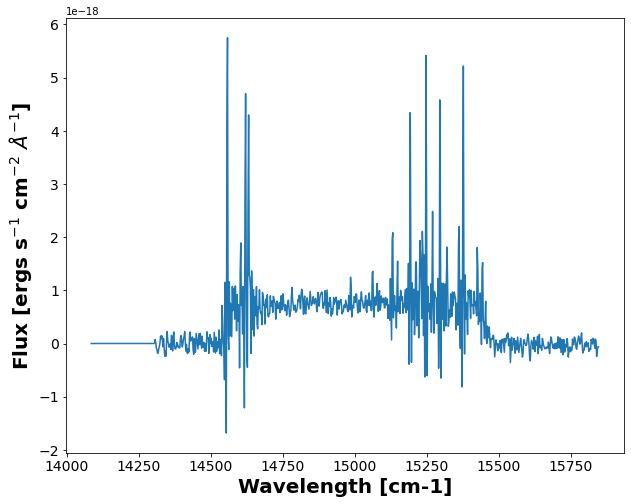

In [4]:
# We use 'mean = True' to take the mean of the emission in the region instead of the sum
bkg_axis, bkg_sky = cube.extract_spectrum_region(Luci_path+'Examples/regions/bkg_M33.reg', mean=True)
lplt.plot_spectrum(bkg_axis, bkg_sky)

We will now fit a single pixel and take a look at the fit. This fit commands has all the same options as all the other commands except for binning :)

In [8]:
# Fit!
axis, sky, fit_dict = cube.fit_pixel(
    ['Halpha', 'NII6548', 'NII6583'],  # lines
    'sincgauss',   # fit function
    [1,1,1],  # velocity relationship
    [1,1,1],  # sigma relationship
    1265, 1789,    # x & y coordinate
    binning=1,  # Set binnning around coordinate -- this will just fit the one pixel
    bkg=bkg_sky,  # Set background
)

<Figure size 432x288 with 0 Axes>

And now we can plot the results

(650.0, 670.0)

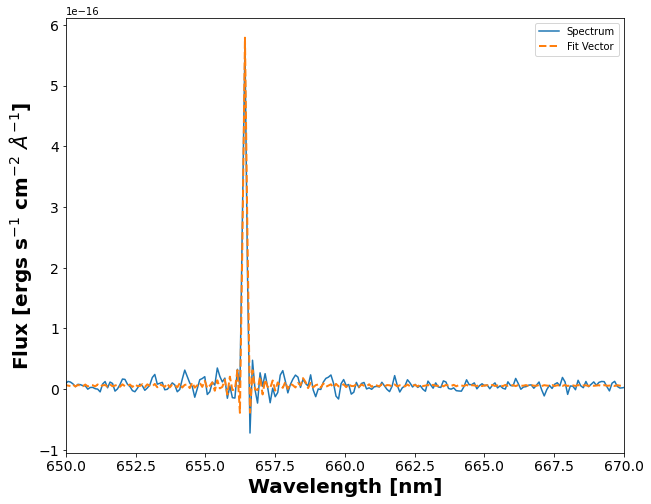

In [10]:
lplt.plot_fit(axis, sky, fit_dict['fit_vector'], units='nm')
plt.xlim(650, 670)

And that is it! Congratulations, you have just used `LUCI`!